In [2]:
OUTDATED_IGNORE=1

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import os, pickle
import pingouin as pg

## READ IN DATA

In [3]:
df = pd.read_csv('../../DerivedData/cohortA_subjects_clinical.csv', index_col=0)

with open('../../DerivedData/cohorts_subjects_list.pickle', 'rb') as handle:
    cohorts = pickle.load(handle)

In [4]:
df = df[df.subject_id.isin(cohorts['A'])]

In [5]:
df['template'] = 39
df.loc[df['GA_birth'] < 37.5, 'template'] = 36
df.loc[df['GA_birth'] < 34.5, 'template'] = 33

In [6]:
i=0
for template in np.unique(df['template'].values):
    print('Template {}: {} subjects'.format(template, len(df[df.template == template])))
    i= i+ len(df[df.template == template])
print('All subjects: {}'.format(i))

Template 33: 14 subjects
Template 36: 42 subjects
Template 39: 239 subjects
All subjects: 295


/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


# AGE DISTRIBUTIONS 

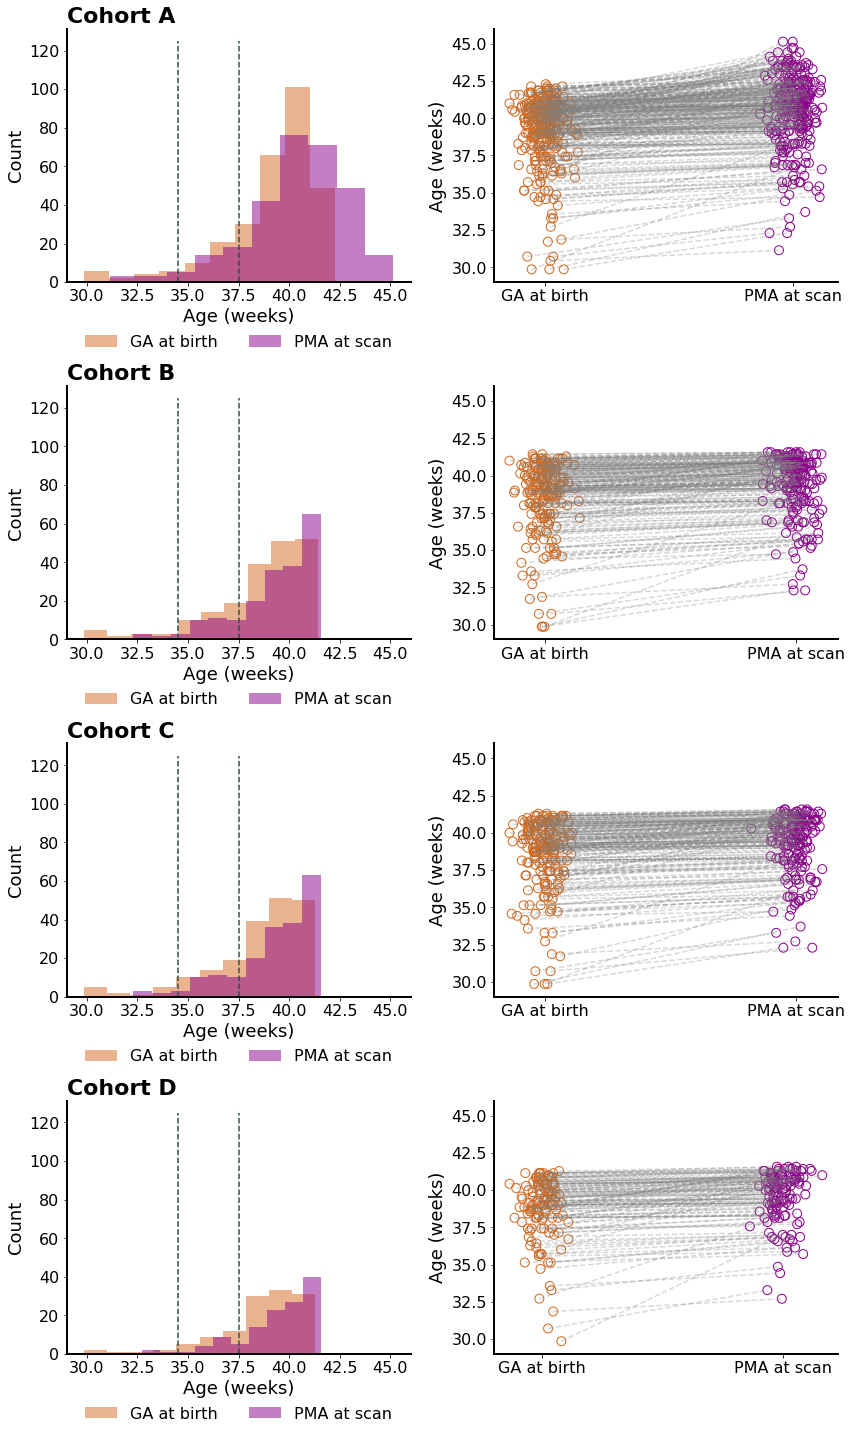

In [13]:
num_rows = len(cohorts.keys())

fig, ax = plt.subplots(num_rows,2, figsize=(12,20))


### plot histogram of birth and scan ages per cohort in a loop at fisrt column
for i, cohort in enumerate(cohorts.keys()):
    
    sub_df = df[df.subject_id.isin(cohorts[cohort])]
   
    ax[i,0].hist(sub_df['GA_birth'].values, label='GA at birth', color='chocolate', alpha=0.5)
    ax[i,0].hist(sub_df['PMA_scan'].values, label='PMA at scan', color='darkmagenta', alpha=0.5)
    ax[i,0].legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.15), 
            fontsize=16, frameon=False, markerscale=0.6)

    ax[i,0].set_xlabel('Age (weeks)', fontsize=18)
    ax[i,0].set_ylabel('Count', fontsize=18)

    # Hide the right and top spines
    ax[i,0].spines['right'].set_visible(False)
    ax[i,0].spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax[i,0].spines[axis].set_linewidth(2)
  
    ax[i,0].tick_params( axis='both', which='major', labelsize=16)
    ax[i,1].tick_params( axis='both', which='major', labelsize=16)

    ax[i,0].vlines( 34.5, 0,125, color='darkslategray', linestyles='dashed')
    ax[i,0].vlines( 37.5, 0,125, color='darkslategray', linestyles='dashed')
    
    ax[i,0].set_title('Cohort {}'.format(cohort), fontsize=22, loc='left', fontweight='bold')
    
    ax[i,0].set_xlim(29, 46)
    
### plot paired plot between GA at birth and PMA at scan per cohort in second column
for i, cohort in enumerate(cohorts.keys()):
    
    sub_df = df[df.subject_id.isin(cohorts[cohort])]

    y1 = np.random.normal(0, 0.05, size=len(sub_df['GA_birth'].values))
    ax[i, 1].scatter(  y1,sub_df['GA_birth'].values, marker= 'o', s=80,
                    facecolors='none', edgecolors = 'chocolate')

    y2 = np.random.normal(1, 0.05, size=len(sub_df['PMA_scan'].values))
    ax[i, 1].scatter(  y2, sub_df['PMA_scan'].values, marker= 'o', s=80,
                    facecolors='none', edgecolors = 'darkmagenta')


    plt.sca(ax[i,1])
    plt.xticks([0, 1], ["GA at birth", "PMA at scan"], fontsize=16)

    ax[i,1].spines['right'].set_visible(False)
    ax[i,1].spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax[i,1].spines[axis].set_linewidth(2)

    ax[i,1].set_ylabel('Age (weeks)', fontsize=18)

    for idx in range(len(y1)):
        ax[i,1].plot([y1[idx],y2[idx]], [sub_df['GA_birth'].values[idx], sub_df['PMA_scan'].values[idx]], '--', color='gray', alpha=0.3)

    ax[i,1].set_ylim(29, 46)
fig.patch.set_facecolor('white')
plt.tight_layout()
#plt.savefig('../../Results/figures/cohort_descriptions/age_distributions_per_cohort.jpg', dpi=300)   
plt.show()

dict_keys(['A', 'B', 'C', 'D'])

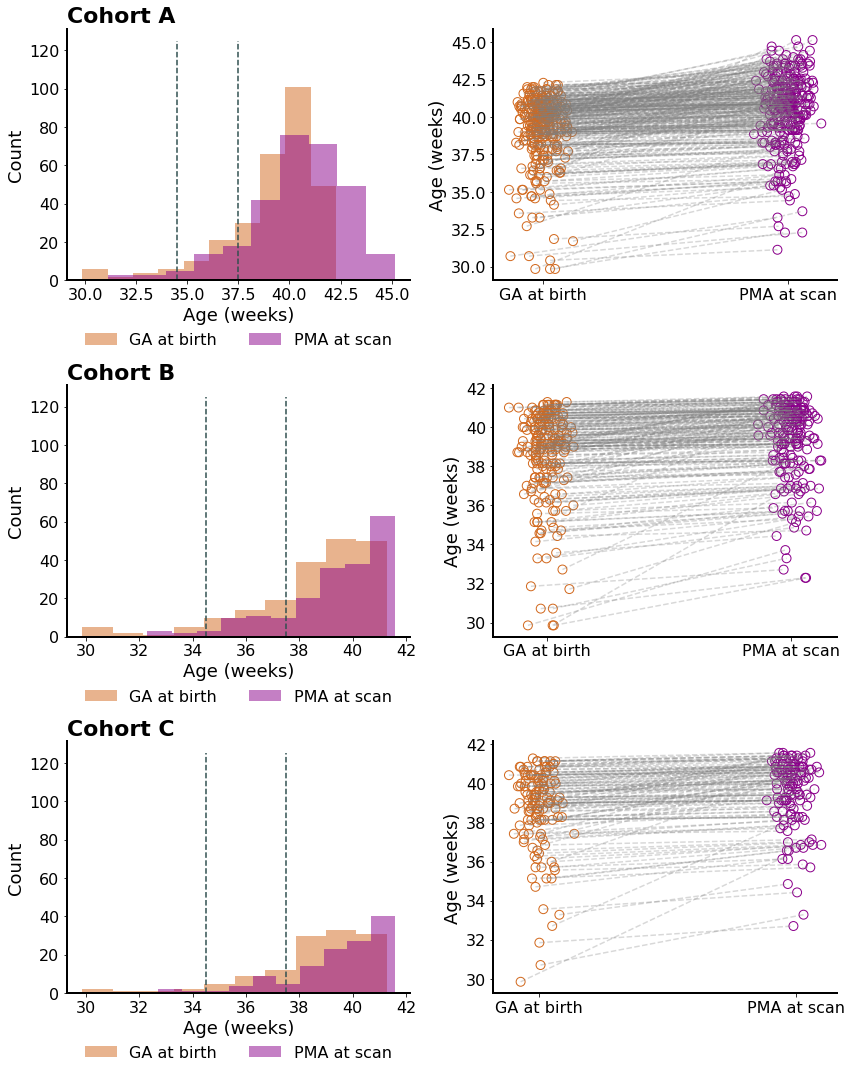

In [12]:
num_rows = len(cohorts.keys())

fig, ax = plt.subplots(3,2, figsize=(12,15))


### plot histogram of birth and scan ages per cohort in a loop at fisrt column
names = ['A', 'B','C']
for i, cohort in enumerate(['A', 'C', 'D']):
    
    sub_df = df[df.subject_id.isin(cohorts[cohort])]
   
    ax[i,0].hist(sub_df['GA_birth'].values, label='GA at birth', color='chocolate', alpha=0.5)
    ax[i,0].hist(sub_df['PMA_scan'].values, label='PMA at scan', color='darkmagenta', alpha=0.5)
    ax[i,0].legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.15), 
            fontsize=16, frameon=False, markerscale=0.6)

    ax[i,0].set_xlabel('Age (weeks)', fontsize=18)
    ax[i,0].set_ylabel('Count', fontsize=18)

    # Hide the right and top spines
    ax[i,0].spines['right'].set_visible(False)
    ax[i,0].spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax[i,0].spines[axis].set_linewidth(2)
  
    ax[i,0].tick_params( axis='both', which='major', labelsize=16)
    ax[i,1].tick_params( axis='both', which='major', labelsize=16)

    ax[i,0].vlines( 34.5, 0,125, color='darkslategray', linestyles='dashed')
    ax[i,0].vlines( 37.5, 0,125, color='darkslategray', linestyles='dashed')
    
    ax[i,0].set_title('Cohort {}'.format(names[i]), fontsize=22, loc='left', fontweight='bold')
    
### plot paired plot between GA at birth and PMA at scan per cohort in second column
for i, cohort in enumerate(['A', 'C', 'D']):
    
    sub_df = df[df.subject_id.isin(cohorts[cohort])]

    y1 = np.random.normal(0, 0.05, size=len(sub_df['GA_birth'].values))
    ax[i, 1].scatter(  y1,sub_df['GA_birth'].values, marker= 'o', s=80,
                    facecolors='none', edgecolors = 'chocolate')

    y2 = np.random.normal(1, 0.05, size=len(sub_df['PMA_scan'].values))
    ax[i, 1].scatter(  y2, sub_df['PMA_scan'].values, marker= 'o', s=80,
                    facecolors='none', edgecolors = 'darkmagenta')


    plt.sca(ax[i,1])
    plt.xticks([0, 1], ["GA at birth", "PMA at scan"], fontsize=16)

    ax[i,1].spines['right'].set_visible(False)
    ax[i,1].spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax[i,1].spines[axis].set_linewidth(2)

    ax[i,1].set_ylabel('Age (weeks)', fontsize=18)

    for idx in range(len(y1)):
        ax[i,1].plot([y1[idx],y2[idx]], [sub_df['GA_birth'].values[idx], sub_df['PMA_scan'].values[idx]], '--', color='gray', alpha=0.3)


fig.patch.set_facecolor('white')
plt.tight_layout()
plt.savefig('../../Results/figures/cohort_descriptions/age_distributions_per_cohort_3cohorts.jpg', dpi=300)   
plt.show()

# dMRI QC (recreates eLife figure)

In [13]:
## need to get the dMRI description first 
qc = pd.read_csv('../../SourceData/release3_subject_info.tsv', sep='\t')

for i, row in df.iterrows():
    
    trans = qc[(qc['participant_id '] == row.subject_id + ' ') & (qc['session_id '] == row.session_id)]['qc_dmri_shard_translation '].values[0]
    rot = qc[(qc['participant_id '] == row.subject_id + ' ') & (qc['session_id '] == row.session_id)]['qc_dmri_shard_rotation '].values[0]
    snr = qc[(qc['participant_id '] == row.subject_id + ' ') & (qc['session_id '] == row.session_id)]['qc_dmri_shard_snr '].values[0]
    outlier = qc[(qc['participant_id '] == row.subject_id + ' ') & (qc['session_id '] == row.session_id)]['qc_dmri_shard_outlier_ratio '].values[0]
    
    df.loc[i, 'qc_dmri_shard_translation'] = trans
    df.loc[i, 'qc_dmri_shard_rotation'] = rot
    df.loc[i, 'qc_dmri_shard_snr'] = snr
    df.loc[i, 'qc_dmri_shard_outlier_ratio'] = outlier

/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
/volatile/miniconda3/envs/ohbm/lib/pytho

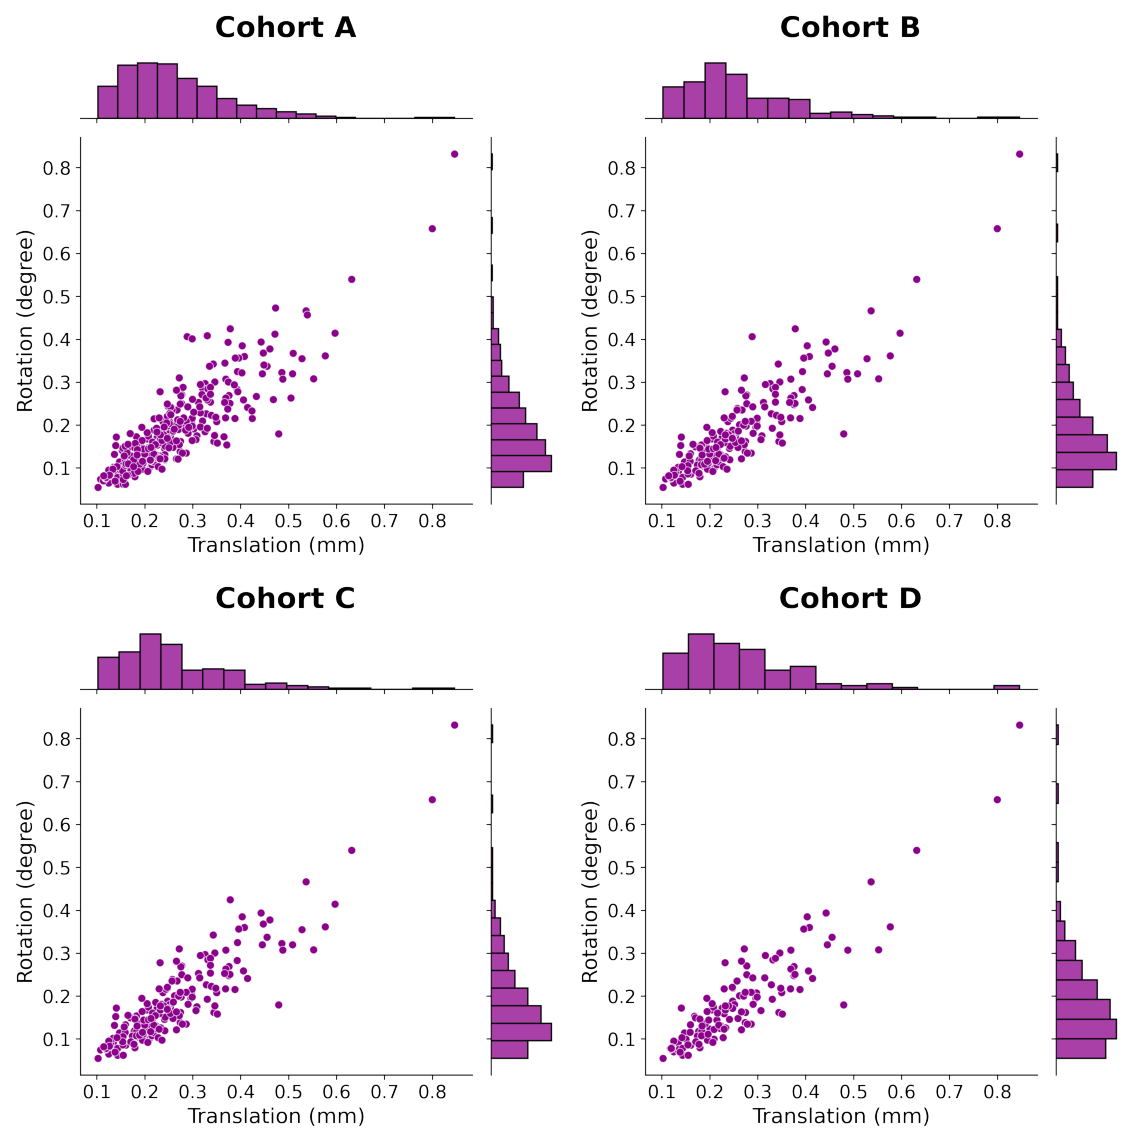

In [14]:
import matplotlib.image as mpimg

subplots = []

# plot motion in dMRI per cohort 
for i, cohort in enumerate(cohorts.keys()):
    
    #fig = plt.figure(figsize=(6,6))
    
    sub_df = df[df.subject_id.isin(cohorts[cohort])]



    h = sns.jointplot(data=sub_df, x='qc_dmri_shard_translation', 
                         y = 'qc_dmri_shard_rotation', color='darkmagenta' )

    h.ax_joint.set_xlabel('Translation (mm)', fontsize=16)
    h.ax_joint.set_ylabel('Rotation (degree)', fontsize=16)

    h.ax_joint.set_yticklabels(np.round(h.ax_joint.get_yticks(),2), size = 14)
    h.ax_joint.set_xticklabels(np.round(h.ax_joint.get_yticks(),2), size = 14)
    
    h.fig.suptitle('Cohort {}'.format(cohort), fontsize=22, fontweight='bold', )
    h.fig.set_tight_layout(tight=4)

    
    #plt.savefig('../../Results/figures/QC_plot_included_dMRI.jpg', dpi=300)
    h.savefig('../../Results/figures/cohort_descriptions/QC_{}.png'.format(i), dpi=300)
    plt.close(h.fig)
    
f, ax = plt.subplots(2, 2, figsize=(16, 16))
axs = ax.ravel()
for i, cohort in enumerate(cohorts.keys()):
    axs[i].imshow(mpimg.imread('../../Results/figures/cohort_descriptions/QC_{}.png'.format(i)))
[ax.set_axis_off() for ax in axs]
plt.tight_layout()

f.patch.set_facecolor('white')
#plt.savefig('../../Results/figures/cohort_descriptions/dMRI_QC_per_cohort.jpg', dpi=300)  
plt.show()

## Assess QC relationship with ages or scores

In [15]:
out_df = pd.DataFrame(columns=['cohort', 'qc_metric', 'rho', 'p-val'])

metric='PMA_scan' #'GA_birth' 'Cognitive Score'

idx = 0
for i, cohort in enumerate(cohorts.keys()):
    #print(cohort)
    sub_df = df[df.subject_id.isin(cohorts[cohort])]
    qc_metrics = [col  for col in sub_df.columns if 'qc' in col]
    
    for qc in qc_metrics:
        #print(qc)
        res = pg.corr(sub_df[qc], sub_df[age])
        #print(res)
        
        new = [cohort, qc, res['r'][0], res['p-val'][0]]
        #append row to end of DataFrame
        out_df = out_df.append(pd.Series(new, index=out_df.columns[:len(new)]), ignore_index=True)

    _ , correct_p = pg.multicomp(out_df[out_df.cohort == cohort]['p-val'].values, method='fdr_bh')
    out_df.loc[out_df.cohort == cohort, 'p-val'] = correct_p
    
print(age)
out_df

NameError: name 'age' is not defined

## Assess QC relationship with global FA

In [16]:
global_diff = pd.read_csv('../../DerivedData/extracted_metrics/global_cortical_diffusion_metrics_median.csv', index_col=0)
hemispheres = ['left', 'right']
for metric in ['FA']:
    for i, row in global_diff .iterrows():
        global_diff .loc[i,metric] = np.mean([row['left_{}'.format(metric)], 
                                   row['right_{}'.format(metric)]])
        
out_df = pd.DataFrame(columns=['cohort', 'qc_metric', 'rho', 'p-val'])

idx = 0
for i, cohort in enumerate(cohorts.keys()):
    #print(cohort)
    sub_df = df[df.subject_id.isin(cohorts[cohort])]
    
    sub_global = global_diff[global_diff.subject_id.isin(sub_df.subject_id.values)]
    sub_df = pd.merge(sub_df, sub_global[['subject_id', 'FA']], on='subject_id')
    
        
    #print(sub_df['FA'].values)
    
    qc_metrics = [col  for col in sub_df.columns if 'qc' in col]
    
    for qc in qc_metrics:
        #print(qc)
        res = pg.corr(sub_df[qc], sub_df['FA'])
        #print(res)
        
        new = [cohort, qc, res['r'][0], res['p-val'][0]]
        
        if qc == 'qc_dmri_shard_snr':
            print(res)
        #append row to end of DataFrame
        out_df = out_df.append(pd.Series(new, index=out_df.columns[:len(new)]), ignore_index=True)

    _ , correct_p = pg.multicomp(out_df[out_df.cohort == cohort]['p-val'].values, method='fdr_bh')
    out_df.loc[out_df.cohort == cohort, 'p-val'] = correct_p

           n         r        CI95%     p-val    BF10     power
pearson  295  0.196322  [0.08, 0.3]  0.000697  22.218  0.925653
           n         r         CI95%     p-val   BF10     power
pearson  198  0.180239  [0.04, 0.31]  0.011054  2.192  0.722554
           n         r         CI95%     p-val   BF10     power
pearson  196  0.182171  [0.04, 0.31]  0.010603  2.285  0.727479
           n         r         CI95%     p-val   BF10     power
pearson  126  0.196515  [0.02, 0.36]  0.027423  1.233  0.600984


In [17]:
out_df

,cohort,qc_metric,rho,p-val
0,A,qc_dmri_shard_translation,0.375496,5.202222e-11
1,A,qc_dmri_shard_rotation,0.434194,2.163853e-14
2,A,qc_dmri_shard_snr,0.196322,9.295777e-04
3,A,qc_dmri_shard_outlier_ratio,0.142463,1.432542e-02
4,B,qc_dmri_shard_translation,0.338687,2.115372e-06
5,B,qc_dmri_shard_rotation,0.398769,2.370417e-08
6,B,qc_dmri_shard_snr,0.180239,1.473907e-02
7,B,qc_dmri_shard_outlier_ratio,0.121110,8.919784e-02
8,C,qc_dmri_shard_translation,0.339403,2.272125e-06
9,C,qc_dmri_shard_rotation,0.389088,6.959074e-08


**dMRI QC is significantly related to ages (not scores) and global FA values. This might need to be adressed in the later stages!!!**

# OUTCOMES

In [19]:
def get_notation(pvals): 
    notation = []
    for value in pvals:
        if value < 0.001:
            notation.append('{}\n***'.format(np.round(value,2)))
        elif 0.001 <= value < 0.01:
            notation.append('{}\n**'.format(np.round(value,2)))
        elif 0.01 <= value < 0.05:
            notation.append('{}\n*'.format(np.round(value,2)))
        else:
            notation.append('{}\nns'.format(np.round(value,2)))
    return np.array(notation) 

In [20]:
scores = ['Cognitive Score', 'Language Score', 'Motor Score']
sc_encoding = ['Cognitive', 'Language', 'Motor']

df['group'] = 'FT'
df.loc[df['GA_birth'] < 37, 'group'] = 'PT'

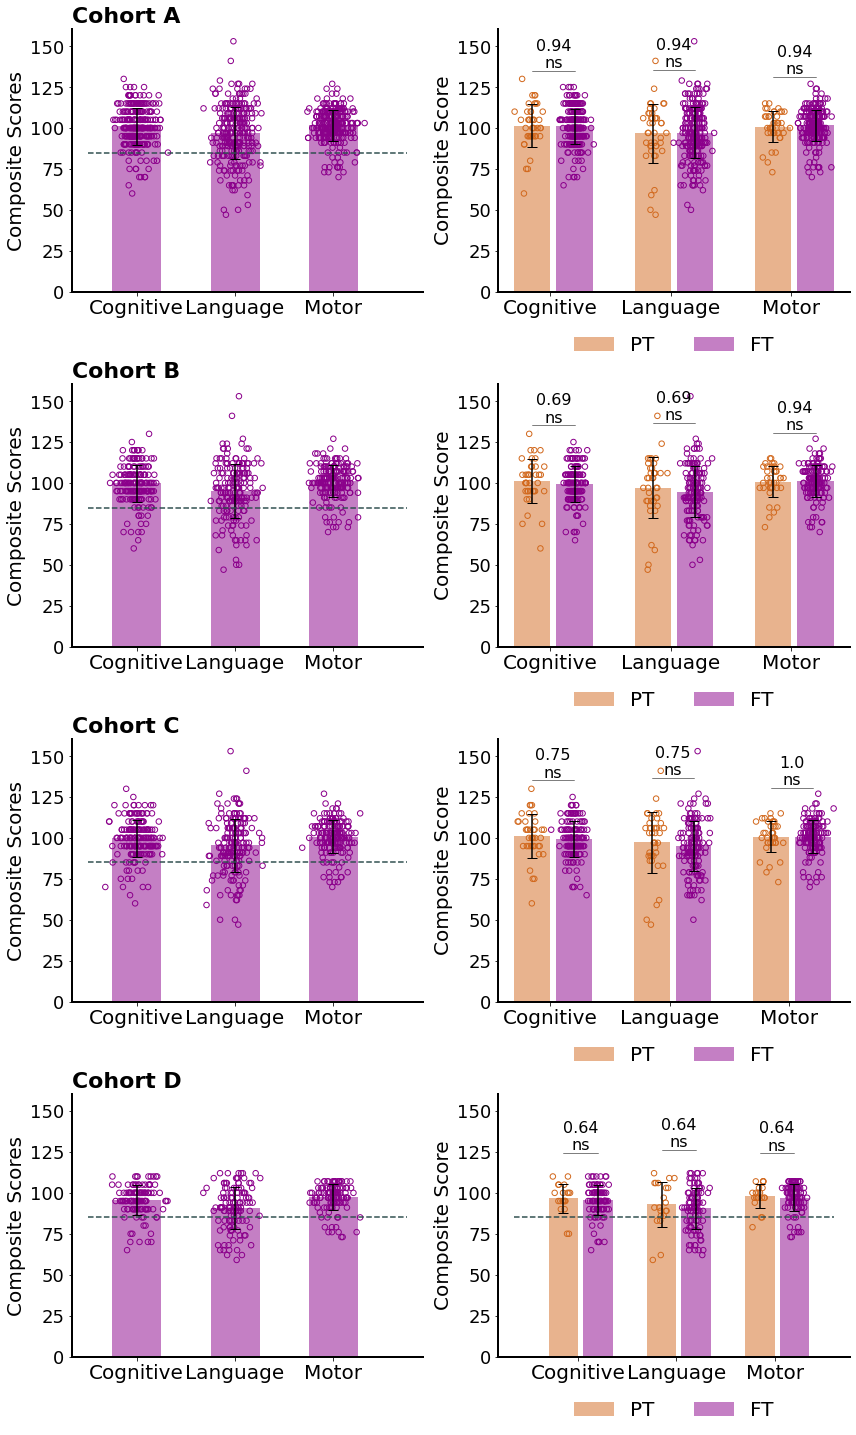

In [21]:
fig, ax = plt.subplots(num_rows, 2, figsize=(12,20), sharey='col')


### ============ first column == whole cohort outcomes ================================= ### 
for ch, cohort in enumerate(cohorts.keys()):
    sub_df = df[df.subject_id.isin(cohorts[cohort])]
    
    ### plot barplots 
    for i, composite in enumerate(scores):
        if i == 0:
            ix = sub_df[composite].values
            std = np.std(ix)
            ax[ch, 0].bar(x = i, height = np.mean(ix), width=0.5, yerr=std, capsize=5,
                   color='darkmagenta', label = 'Cohort 4', alpha=0.5)
        else: 
            ix = sub_df[composite].values
            std = np.std(ix)
            ax[ch, 0].bar(x = i, height =  np.mean(ix), width=0.5, yerr=std, capsize=5,
                   color='darkmagenta', alpha=0.5)
    ### plot real values 
    for i, composite in enumerate(scores):

        color='darkmagenta'
        ix = sub_df[composite].values
        y = np.random.normal(i, 0.1, size=len(ix))
    
        ax[ch, 0].scatter(  y,ix, marker= 'o', s=30,
                    facecolors='none', edgecolors = color)
        
    ### set the visuals 
    # Hide the right and top spines
    ax[ch, 0].spines['right'].set_visible(False)
    ax[ch, 0].spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax[ch, 0].spines[axis].set_linewidth(2)
        
    #ax[ch, 0].set_title('BSID-III at 18 months', fontsize=20)
    #ax[ch, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
    #       ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
    ax[ch,0].set_title('Cohort {}'.format(cohort), fontsize=22, loc='left', fontweight='bold')

    ax[ch, 0].tick_params(axis='y', labelsize=18)    
    ax[ch, 0].set_ylabel('Composite Scores', fontsize=20)
    ax[ch, 0].set_xticks(np.array(range(3)))
    ax[ch, 0].set_xticklabels(sc_encoding)
    ax[ch, 0].tick_params(axis='x', labelsize=20)

    ax[ch, 0].hlines( 85, -0.5, 2.75, color='darkslategray', linestyles='dashed')
 


### ============ second column == PT vs FT ================================= ###
for ch, cohort in enumerate(cohorts.keys()):
    sub_df = df[df.subject_id.isin(cohorts[cohort])]

    pvals = []
    max_h = []
    
    for i, composite in enumerate(scores):
        if i == 0:
            # preterm         
            ix = sub_df[sub_df['group'] == 'PT'][composite].values
            std = np.std(ix)
            ax[ch,1].bar(x = i, height = np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate', label = 'PT', alpha=0.5)
            # control 
            ix2 = sub_df[sub_df['group'] == 'FT'][composite].values
            std2 = np.std(ix2)
            ax[ch,1].bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta', label = 'FT', alpha=0.5)
        
            test = pg.ttest(ix, ix2)
            p = np.round(np.float32(test['p-val'].values[0]),2)
            pvals.append(p)
            max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
        else: 
            # preterm         
            ix = sub_df[sub_df['group'] == 'PT'][composite].values
            std = np.std(ix)
            ax[ch,1].bar(x = i, height =  np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate', alpha=0.5)
            # control 
            ix2 = sub_df[sub_df['group'] == 'FT'][composite].values
            std2 = np.std(ix2)
            ax[ch,1].bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta', alpha=0.5)
 
            test = pg.ttest(ix, ix2)
            p = np.round(np.float32(test['p-val'].values[0]),2)
            pvals.append(p)
            max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
            
        ### adjust caps etc 
        

    ax[ch,1].set_ylabel('Composite Score', fontsize=20)
    
    ax[ch, 1].set_xticks(np.array(range(3))+.15)
    ax[ch, 1].set_xticklabels(sc_encoding)
    ax[ch, 1].tick_params(axis='x', labelsize=20)

    a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
    notation = get_notation(pvals=pvals_corr)
    for i, txt in enumerate(notation):
        x1,x2 =  i, i+0.35          
        y, h, col = max_h[i] * 1.18 , 0.0001, 'k'
        ax[ch,1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
        ax[ch,1].text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)

    ##### REAL VALUES 
    for i, composite in enumerate(scores):
        
        ### preterm 
        group_name = 'PT'
        color = 'chocolate'
        ix = sub_df[sub_df['group'] == 'PT'][composite].values
        y = np.random.normal(i, 0.05, size=len(ix))
    
        ax[ch,1].scatter(  y,ix, marker= 'o', s=30,
                    facecolors='none', edgecolors = color)
    
        ### term 
        group_name = 'FT'
        color = 'darkmagenta'
        ix = sub_df[sub_df['group'] == 'FT'][composite].values
        y = np.random.normal(i+0.35, 0.05, size=len(ix))
        ax[ch,1].scatter( y,ix, marker= 'o', s=30,
                     facecolors='none', edgecolors = color)

        
    # Make prettier
    ax[ch,1].spines['right'].set_visible(False)
    ax[ch,1].spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax[ch,1].spines[axis].set_linewidth(2)

    ax[ch,1].tick_params(axis='y', labelsize=18)    
    #ax[ch,1].set_title('BSID-III at 18 months', fontsize=20)

    ax[ch,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
    #ax[ch,1].set_ylim([0,max(max_h)+35])


#axs[0].vlines( 85, -0.5, 2.5, color='darkslategray', linestyles='dashed')
plt.hlines( 85, -0.5, 2.75, color='darkslategray', linestyles='dashed')
plt.tight_layout()
fig.subplots_adjust(hspace=.35)

fig.patch.set_facecolor('white')
#fig.savefig('../../Results/figures/cohort_descriptions/BSID_per_cohort.png', dpi=300)
plt.show() 

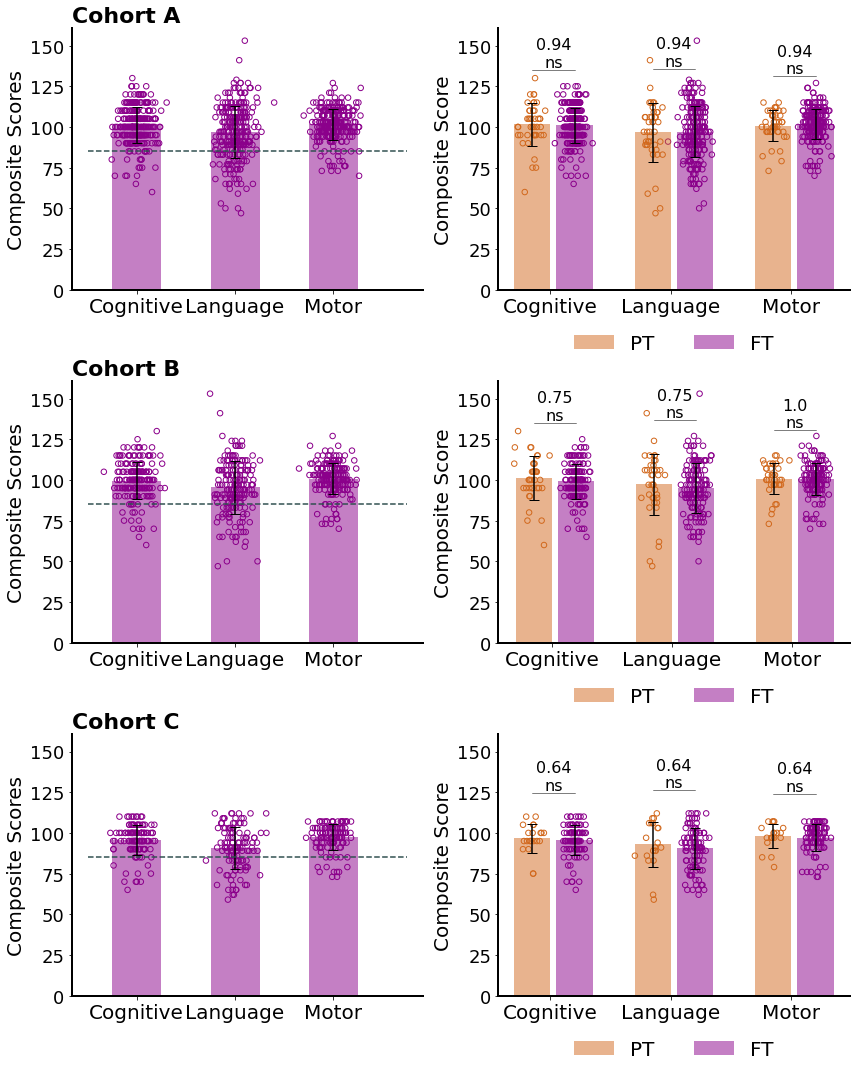

In [24]:
fig, ax = plt.subplots(3, 2, figsize=(12,15), sharey='col')

names = ['A', 'B', 'C']
### ============ first column == whole cohort outcomes ================================= ### 
for ch, cohort in enumerate(['A', 'C', 'D']):
    sub_df = df[df.subject_id.isin(cohorts[cohort])]
    
    ### plot barplots 
    for i, composite in enumerate(scores):
        if i == 0:
            ix = sub_df[composite].values
            std = np.std(ix)
            ax[ch, 0].bar(x = i, height = np.mean(ix), width=0.5, yerr=std, capsize=5,
                   color='darkmagenta', label = 'Cohort 4', alpha=0.5)
        else: 
            ix = sub_df[composite].values
            std = np.std(ix)
            ax[ch, 0].bar(x = i, height =  np.mean(ix), width=0.5, yerr=std, capsize=5,
                   color='darkmagenta', alpha=0.5)
    ### plot real values 
    for i, composite in enumerate(scores):

        color='darkmagenta'
        ix = sub_df[composite].values
        y = np.random.normal(i, 0.1, size=len(ix))
    
        ax[ch, 0].scatter(  y,ix, marker= 'o', s=30,
                    facecolors='none', edgecolors = color)
        
    ### set the visuals 
    # Hide the right and top spines
    ax[ch, 0].spines['right'].set_visible(False)
    ax[ch, 0].spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax[ch, 0].spines[axis].set_linewidth(2)
        
    #ax[ch, 0].set_title('BSID-III at 18 months', fontsize=20)
    #ax[ch, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
    #       ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
    ax[ch,0].set_title('Cohort {}'.format(names[ch]), fontsize=22, loc='left', fontweight='bold')

    ax[ch, 0].tick_params(axis='y', labelsize=18)    
    ax[ch, 0].set_ylabel('Composite Scores', fontsize=20)
    ax[ch, 0].set_xticks(np.array(range(3)))
    ax[ch, 0].set_xticklabels(sc_encoding)
    ax[ch, 0].tick_params(axis='x', labelsize=20)

    ax[ch, 0].hlines( 85, -0.5, 2.75, color='darkslategray', linestyles='dashed')
 


### ============ second column == PT vs FT ================================= ###
for ch, cohort in enumerate(['A', 'C', 'D']):
    sub_df = df[df.subject_id.isin(cohorts[cohort])]

    pvals = []
    max_h = []
    
    for i, composite in enumerate(scores):
        if i == 0:
            # preterm         
            ix = sub_df[sub_df['group'] == 'PT'][composite].values
            std = np.std(ix)
            ax[ch,1].bar(x = i, height = np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate', label = 'PT', alpha=0.5)
            # control 
            ix2 = sub_df[sub_df['group'] == 'FT'][composite].values
            std2 = np.std(ix2)
            ax[ch,1].bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta', label = 'FT', alpha=0.5)
        
            test = pg.ttest(ix, ix2)
            p = np.round(np.float32(test['p-val'].values[0]),2)
            pvals.append(p)
            max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
        else: 
            # preterm         
            ix = sub_df[sub_df['group'] == 'PT'][composite].values
            std = np.std(ix)
            ax[ch,1].bar(x = i, height =  np.mean(ix), width=0.3, yerr=std, capsize=5,
                   color='chocolate', alpha=0.5)
            # control 
            ix2 = sub_df[sub_df['group'] == 'FT'][composite].values
            std2 = np.std(ix2)
            ax[ch,1].bar(x = i+0.35, height =  np.mean(ix2),width=0.3, yerr=std2, capsize=5,
                   color='darkmagenta', alpha=0.5)
 
            test = pg.ttest(ix, ix2)
            p = np.round(np.float32(test['p-val'].values[0]),2)
            pvals.append(p)
            max_h.append(max([np.mean(ix) + std, np.mean(ix2) + std2]))
            
        ### adjust caps etc 
        

    ax[ch,1].set_ylabel('Composite Score', fontsize=20)
    
    ax[ch, 1].set_xticks(np.array(range(3))+.15)
    ax[ch, 1].set_xticklabels(sc_encoding)
    ax[ch, 1].tick_params(axis='x', labelsize=20)

    a, pvals_corr= pg.multicomp(pvals, method='fdr_bh')
    notation = get_notation(pvals=pvals_corr)
    for i, txt in enumerate(notation):
        x1,x2 =  i, i+0.35          
        y, h, col = max_h[i] * 1.18 , 0.0001, 'k'
        ax[ch,1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
        ax[ch,1].text((x1+x2)*.5, y+h, txt, fontsize=16,
                ha='center', va='bottom', color=col)

    ##### REAL VALUES 
    for i, composite in enumerate(scores):
        
        ### preterm 
        group_name = 'PT'
        color = 'chocolate'
        ix = sub_df[sub_df['group'] == 'PT'][composite].values
        y = np.random.normal(i, 0.05, size=len(ix))
    
        ax[ch,1].scatter(  y,ix, marker= 'o', s=30,
                    facecolors='none', edgecolors = color)
    
        ### term 
        group_name = 'FT'
        color = 'darkmagenta'
        ix = sub_df[sub_df['group'] == 'FT'][composite].values
        y = np.random.normal(i+0.35, 0.05, size=len(ix))
        ax[ch,1].scatter( y,ix, marker= 'o', s=30,
                     facecolors='none', edgecolors = color)

        
    # Make prettier
    ax[ch,1].spines['right'].set_visible(False)
    ax[ch,1].spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax[ch,1].spines[axis].set_linewidth(2)

    ax[ch,1].tick_params(axis='y', labelsize=18)    
    #ax[ch,1].set_title('BSID-III at 18 months', fontsize=20)

    ax[ch,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           ncol = 2, fontsize=20, frameon=False, markerscale=0.8)
    #ax[ch,1].set_ylim([0,max(max_h)+35])


#axs[0].vlines( 85, -0.5, 2.5, color='darkslategray', linestyles='dashed')
#plt.hlines( 85, -0.5, 2.75, color='darkslategray', linestyles='dashed')
plt.tight_layout()
fig.subplots_adjust(hspace=.35)

fig.patch.set_facecolor('white')
#fig.savefig('../../Results/figures/cohort_descriptions/BSID_per_cohort.png', dpi=300)
plt.show() 

## Correlation with AGES

In [17]:
## add age at asessment 
a = pd.read_csv('../../SourceData/DHCPNDH1-TomArichiSaraNeumane_DATA_2021-12-16_1359.csv', low_memory=False)
a = a[['participationid','age_at_assess_m']].dropna()

for i,row in df.iterrows():
    df.loc[i, 'bayley_age'] = a[a['participationid'] == row['subject_id']]['age_at_assess_m'].values[0]
    

In [18]:
for ch, cohort in enumerate(cohorts.keys()):
    sub_df = df[df.subject_id.isin(cohorts[cohort])]
    
    cor_res = pd.DataFrame()
    i=0
    for score in scores:
        for age in ['GA_birth', 'PMA_scan', 'bayley_age']:
            test = pg.corr(sub_df[age], sub_df[score])
        
            cor_res.loc[i, 'score'] = score
            cor_res.loc[i, age] = test['p-val'].values[0]
            #print(test)
        i=i+1

    ## correction 
    for age in ['GA_birth', 'PMA_scan', 'bayley_age']:
        cor_res[age] = pg.multicomp(cor_res[age].values, method='fdr_bh')[1]
        
    print('Cohort', cohort)
    print(cor_res)

Cohort A
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.488041  0.310039    0.335559
1   Language Score  0.488041  0.310039    0.335559
2      Motor Score  0.488041  0.310039    0.488581
Cohort B
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.796451  0.537587    0.411651
1   Language Score  0.796451  0.537587    0.411651
2      Motor Score  0.796451  0.717888    0.793786
Cohort C
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.933649  0.596653    0.512426
1   Language Score  0.933649  0.596653    0.512426
2      Motor Score  0.933649  0.596653    0.761045
Cohort D
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.928603  0.839291    0.421312
1   Language Score  0.928603  0.839291    0.421312
2      Motor Score  0.928603  0.839291    0.797517


In [20]:
for ch, cohort in enumerate(cohorts.keys()):
    sub_df = df[df.subject_id.isin(cohorts[cohort])]
    
    cor_res = pd.DataFrame()
    i=0
    for score in scores:
        for age in ['GA_birth', 'PMA_scan', 'bayley_age']:
            test = pg.corr(sub_df[age], sub_df[score])
        
            cor_res.loc[i, 'score'] = score
            cor_res.loc[i, age] = test['r'].values[0]
            #print(test)
        i=i+1

    ## correction 
    #for age in ['GA_birth', 'PMA_scan', 'bayley_age']:
    #    cor_res[age] = pg.multicomp(cor_res[age].values, method='fdr_bh')[1]
        
    print('Cohort', cohort)
    print(cor_res)

Cohort A
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.041175  0.059303   -0.091517
1   Language Score  0.040528  0.061111   -0.071053
2      Motor Score  0.073464  0.065768   -0.040478
Cohort B
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score -0.028444 -0.066801   -0.083472
1   Language Score -0.049570 -0.065615   -0.078045
2      Motor Score  0.018446 -0.025835   -0.018693
Cohort C
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score -0.031737 -0.070142   -0.085627
1   Language Score -0.035377 -0.052745   -0.068284
2      Motor Score  0.005985 -0.038031   -0.021859
Cohort D
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.062345  0.038087   -0.116688
1   Language Score -0.013483 -0.018247   -0.096807
2      Motor Score -0.008063 -0.020589    0.023083


In [19]:
## per infant group
for group in ['PT', 'FT']:
    print('====== Group', group)
    for ch, cohort in enumerate(cohorts.keys()):
        sub_df = df[df.subject_id.isin(cohorts[cohort])]
        sub_df = sub_df[sub_df.group == group]
        cor_res = pd.DataFrame()
        i=0
        for score in scores:
            for age in ['GA_birth', 'PMA_scan', 'bayley_age']:
                test = pg.corr(sub_df[age], sub_df[score])
        
                cor_res.loc[i, 'score'] = score
                cor_res.loc[i, age] = test['p-val'].values[0]
                #print(test)
            i=i+1

        ## correction 
        for age in ['GA_birth', 'PMA_scan', 'bayley_age']:
            cor_res[age] = pg.multicomp(cor_res[age].values, method='fdr_bh')[1]
        
        print('Cohort', cohort)
        print(cor_res)

====== Group PT
Cohort A
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.994616  0.837571    0.061137
1   Language Score  0.994616  0.537800    0.709952
2      Motor Score  0.994616  0.837571    0.061137
Cohort B
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.812306  0.295258    0.098061
1   Language Score  0.812306  0.205742    0.744144
2      Motor Score  0.812306  0.295258    0.098061
Cohort C
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.812306  0.295258    0.098061
1   Language Score  0.812306  0.205742    0.744144
2      Motor Score  0.812306  0.295258    0.098061
Cohort D
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.146468  0.578774    0.359555
1   Language Score  0.220410  0.613449    1.000000
2      Motor Score  0.220410  0.578774    0.359555
====== Group FT
Cohort A
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.108136  0.041738    0.375167
1   L

In [21]:
## per infant group
for group in ['PT', 'FT']:
    print('====== Group', group)
    for ch, cohort in enumerate(cohorts.keys()):
        sub_df = df[df.subject_id.isin(cohorts[cohort])]
        sub_df = sub_df[sub_df.group == group]
        cor_res = pd.DataFrame()
        i=0
        for score in scores:
            for age in ['GA_birth', 'PMA_scan', 'bayley_age']:
                test = pg.corr(sub_df[age], sub_df[score])
        
                cor_res.loc[i, 'score'] = score
                cor_res.loc[i, age] = test['r'].values[0]
                #print(test)
            i=i+1

        ## correction 
        #for age in ['GA_birth', 'PMA_scan', 'bayley_age']:
        #    cor_res[age] = pg.multicomp(cor_res[age].values, method='fdr_bh')[1]
        
        print('Cohort', cohort)
        print(cor_res)

====== Group PT
Cohort A
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.066828 -0.032203   -0.326368
1   Language Score -0.119734 -0.208694   -0.058390
2      Motor Score -0.001060 -0.033326   -0.313337
Cohort B
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.039286 -0.171941   -0.328922
1   Language Score -0.138432 -0.294695   -0.053979
2      Motor Score -0.054864 -0.189179   -0.298019
Cohort C
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.039286 -0.171941   -0.328922
1   Language Score -0.138432 -0.294695   -0.053979
2      Motor Score -0.054864 -0.189179   -0.298019
Cohort D
             score  GA_birth  PMA_scan    bayley_age
0  Cognitive Score  0.434877  0.199537 -3.454246e-01
1   Language Score  0.280852  0.117020  6.938894e-18
2      Motor Score  0.279150  0.238123 -2.682548e-01
====== Group FT
Cohort A
             score  GA_birth  PMA_scan  bayley_age
0  Cognitive Score  0.101451  0.138590   -0.0727